# Basic Convolutional Neural Network
***Honors Project by Peyton Warren***

This neural net uses the MNIST dataset with the listed layers:
1. Convolutional layer
2. Max Pooling layer
3. Fully Connected layer

In [5]:
from __future__ import print_function
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback

import matplotlib.pylab as plt

In [6]:
# Settings for training the model later on
batch_size = 128    # 128 items in the training data are being used
num_classes = 10    # Number of classifications
epochs = 10         # performing 10 epochs
input_shape = (img_x, img_y, channels)

(60000, 28, 28, 1)
(60000, 10)


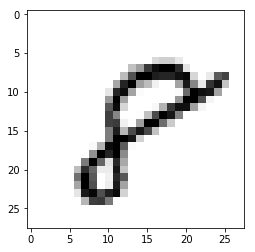

In [7]:
# Data setup
# Download mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# creating the image dimension variables and the number of channels
img_x, img_y = x_train.shape[1], x_train.shape[2]
channels = 1

plt.imshow(x_train[59999], cmap=plt.cm.binary)

# Reshape into 4D tensor with tensorflow reshape function
# Putting it into the format "channels_last" data format (batch, cols, rows, channels)
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, channels)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, channels)

# change data type to floating point numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data, x_train & x_test now between 0 and 1
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# print(type(x_train))    # x_train is a numpy.ndarray object
print(x_train.shape)
print(y_train.shape)

In [8]:
model = Sequential()

In [9]:
# Adds layers

# Convolutional Layer
model.add(Conv2D(32, kernel_size = (5, 5), strides = (1, 1), # (5, 1),
                 activation='relu',
                 input_shape=input_shape))

# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(num_classes))

In [10]:
# Optimizer: Stochastic Gradient Descent
sgd = SGD(lr=0.0001)

# Compile follows setting up the neural network
model.compile(optimizer=sgd,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [12]:
model.fit(x_train, y_train,      # inputing the training x and y
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,             # verbose 1 means it has a progress bar for every epoch
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 321us/step - loss: 2.6686 - acc: 0.0992 - val_loss: 2.2571 - val_acc: 0.0980
Epoch 2/10
60000/60000 [==============================] - 18s 301us/step - loss: 2.1711 - acc: 0.0987 - val_loss: 2.0896 - val_acc: 0.0980
Epoch 3/10
60000/60000 [==============================] - 18s 304us/step - loss: 2.0087 - acc: 0.1203 - val_loss: 1.9162 - val_acc: 0.1659
Epoch 4/10
60000/60000 [==============================] - 18s 303us/step - loss: 1.7672 - acc: 0.2111 - val_loss: 1.4971 - val_acc: 0.2886
Epoch 5/10
60000/60000 [==============================] - 18s 304us/step - loss: 6.0069 - acc: 0.2472 - val_loss: 6.1221 - val_acc: 0.1562
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 5.8852 - acc: 0.1600 - val_loss: 8.4686 - val_acc: 0.1438
Epoch 7/10
60000/60000 [==============================] - 20s 339us/step - loss: 7.9803 - acc: 0.1560 - val_loss: 7.

In [13]:
score = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 136us/step


In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# print(model.metrics_namess)

Test loss: 5.955017721557617
Test accuracy: 0.1691


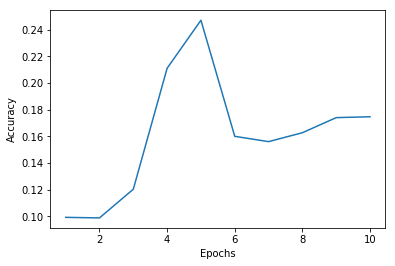

In [15]:
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()